In [1]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan_history_data = pd.read_csv('loan/loan.csv')

In [3]:
loan_history_data.shape

(39717, 111)

In [4]:
loan_history_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
## check if the columns carries any null values
loan_history_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
# drop the columns that have null values
loan_history_data.dropna(axis=1, inplace=True, how='all')

In [7]:
loan_history_data.shape

(39717, 57)

In [8]:
loan_history_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [9]:
columns_with_same_value=[]
for column in loan_history_data.columns:
    if loan_history_data[column].nunique()==1:
        columns_with_same_value.append(column)

columns_with_same_value
# 'pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [10]:
## drop the non unique columns
loan_history_data.drop(columns_with_same_value, axis=1, inplace=True)

In [11]:
loan_history_data[loan_history_data.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


In [12]:
null_data = loan_history_data[loan_history_data.isnull().any(axis=1)]
columns_with_nulls = loan_history_data.columns[loan_history_data.isnull().any()]
print(columns_with_nulls)

Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')


In [13]:
loan_history_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

### Dropping some the unused columns

In [14]:
drop_unnecessary_cols = ['id','url', 'desc', 'title', 'zip_code','emp_title','last_pymnt_d','member_id','open_acc','out_prncp','out_prncp_inv','pub_rec','revol_util','revol_bal','recoveries','collection_recovery_fee', 'delinq_2yrs','earliest_cr_line','inq_last_6mths','last_credit_pull_d','last_pymnt_amnt']
loan_history_data.drop(drop_unnecessary_cols, axis = 1, inplace = True)

In [15]:
loan_history_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'mths_since_last_delinq',
       'mths_since_last_record', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'next_pymnt_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [16]:
for column in loan_history_data.columns:
    missing_values = round(loan_history_data[column].isna().sum() / loan_history_data.shape[0], 2)
    if missing_values >= 0.60:
        loan_history_data.drop(column, axis = 1, inplace = True)
loan_history_data.shape

(39717, 24)

### Data Standardization

In [17]:
loan_history_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [18]:
# Removing the current inprogress loan status records as these records will not provide any insights
loan_history_data = loan_history_data[loan_history_data['loan_status']!='Current']
loan_history_data.shape

(38577, 24)

In [19]:
loan_history_data['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [20]:
# There are only 1033 records with employee lenght as null out of 38577 total values. Impute the null values with mode
loan_history_data.emp_length.fillna(loan_history_data.emp_length.mode()[0], inplace=True)
loan_history_data.emp_length.isna().sum()

0

In [21]:

loan_history_data['emp_length'] = loan_history_data['emp_length'].replace(['10+ years', '9 years', '8 years', '7 years','6 years','5 years','4 years','3 years','2 years','1 year','< 1 year'],
                                                                          ['10','9','8','7','6','5','4','3','2','1','0',])
loan_history_data['emp_length'] = loan_history_data['emp_length'].apply(lambda x: int(x))

loan_history_data['emp_length'].unique()



array([10,  0,  3,  8,  9,  4,  5,  1,  6,  2,  7], dtype=int64)

In [22]:
### Convert the interest rate to numberical value
loan_history_data.int_rate = pd.to_numeric(loan_history_data.int_rate.apply(lambda x : x.split('%')[0]))

In [23]:
# Convert term column to int type
loan_history_data.term = loan_history_data.term.apply(lambda x: int(x.replace('months', '').strip()))

In [24]:
loan_history_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'pub_rec_bankruptcies'],
      dtype='object')

In [25]:
### Derive loan issued month and year from issue_d column
issued_month_year = loan_history_data['issue_d'].str.partition("-", True)     
loan_history_data['issued_month'] = issued_month_year[0]
loan_history_data['issued_year'] = '20' + issued_month_year[2]

In [26]:
loan_history_data.shape

(38577, 26)

In [27]:
loan_history_data = loan_history_data[loan_history_data.pub_rec_bankruptcies.notna()]

In [28]:
loan_history_data.shape

(37880, 26)

In [29]:
loan_history_data.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
total_acc               0
total_pymnt             0
total_pymnt_inv         0
total_rec_prncp         0
total_rec_int           0
total_rec_late_fee      0
pub_rec_bankruptcies    0
issued_month            0
issued_year             0
dtype: int64

In [30]:
def create_boxplot(df: pd.DataFrame, column_name: str, title: str = None) -> None:

    plt.figure(figsize=(3, 3))
    sns.boxplot(y=df[column_name], orient='v')
    if title:
        plt.title(title)

    plt.xlabel(column_name, fontsize=10)
    # plt.ylabel('Values', fontsize=10)
    plt.show()

In [31]:
def create_barplot(data, x: str,y: str, hue: str = None) -> None:

    plt.figure(figsize=(10, 10))
    sns.barplot(data =data,x=x, y=y, hue =hue)
    # plt.xticks(rotation=90)
    plt.show()

In [32]:
def create_countplot(data, x: str, position=None) -> None:

    fig,ax = plt.subplots(figsize = (5,5))
    ax.set_yscale('log')
    
    if position:
        sns.countplot(x=x, data=data, ax=ax[position])
    else:
        sns.countplot(x=x, data=data)
    plt.show()

In [33]:
def create_bar_line_plot(df, column, stacked=False):
    # Calculate Charged Off percentage
    charged_off_loan_data = pd.crosstab(df[column], df['loan_status'], margins=True)
    charged_off_loan_data['Total'] = charged_off_loan_data['Charged Off'] + charged_off_loan_data['Fully Paid']
    charged_off_loan_data['Charged Off %'] = round((charged_off_loan_data['Charged Off'] * 100 / charged_off_loan_data['Total']), 2)
    charged_off_loan_data = charged_off_loan_data[0:-1]

    # Plot
    fig, ax1 = plt.subplots(figsize=(21, 9))

    # Line plot 
    charged_off_line_plot = charged_off_loan_data[['Charged Off %']]
    line = charged_off_line_plot.plot(ax=ax1, marker='o', color='r', lw=2)
    line.set_title(column.title() + ' vs Charged Off %', fontsize=20, weight="bold")
    line.set_xlabel(column.title())
    line.set_ylabel('Charged Off %')

    # Bar plot
    charged_off_bar_plot = charged_off_loan_data.iloc[:, 0:3]
    ax2 = charged_off_bar_plot.plot(kind='bar', ax=ax1, rot=1, secondary_y=True, stacked=stacked)
    ax2.set_ylabel('Number of Loans')
    
    plt.show()

### Outliers

In [34]:
first_qauantile = loan_history_data.annual_inc.quantile(0.25)
third_qauantile = loan_history_data.annual_inc.quantile(0.75)
iqr = third_qauantile - first_qauantile
lower_bound = first_qauantile - 1.5 * iqr
upper_bound = third_qauantile + 1.5 * iqr
is_annual_inc_lb = loan_history_data.annual_inc > lower_bound
is_annual_inc_ub = loan_history_data.annual_inc < upper_bound
req_income = is_annual_inc_lb & is_annual_inc_ub

loan_history_data = loan_history_data[req_income]

In [35]:
loan_history_data.shape

(36094, 26)

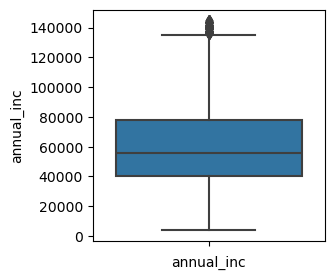

In [36]:
create_boxplot(loan_history_data, 'annual_inc')

## Data Analysis

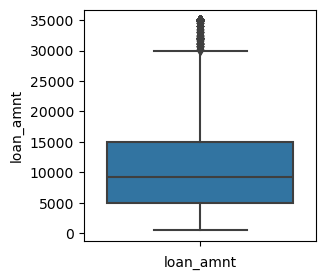

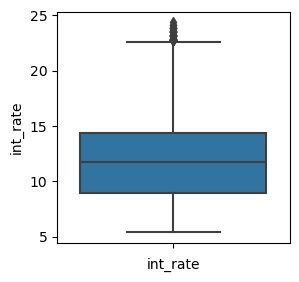

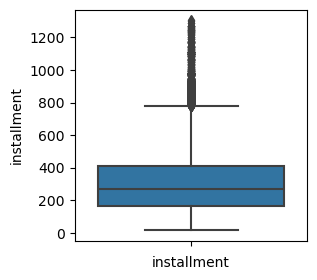

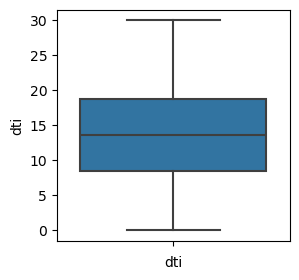

In [37]:
# create_boxplot(loan_history_data, 'funded_amnt')

create_boxplot(loan_history_data, 'loan_amnt')
create_boxplot(loan_history_data, 'int_rate')
create_boxplot(loan_history_data, 'installment')
create_boxplot(loan_history_data, 'dti')

 - The loan amount of most of the loan applicants is in between 5000 and 15000 USD
 - The interest rate on the loan is between 8.5% - 14.5%
 - EMI amount on the loan is between 180 - 420
 - The debt to income ratio is between 8 - 18

### Univariant analysis

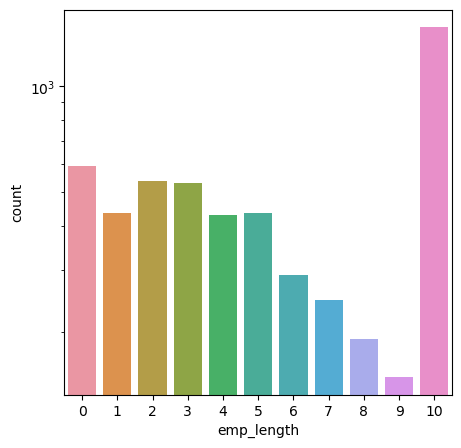

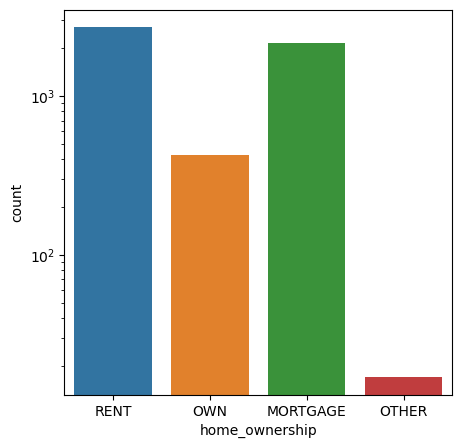

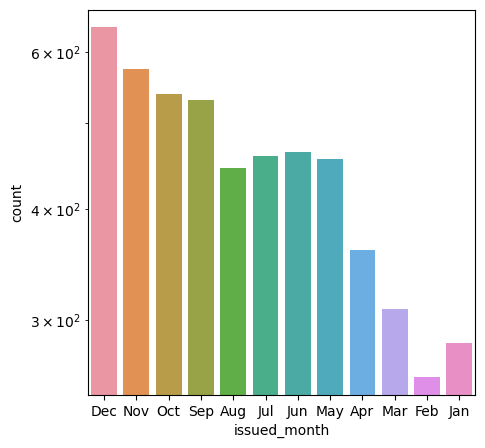

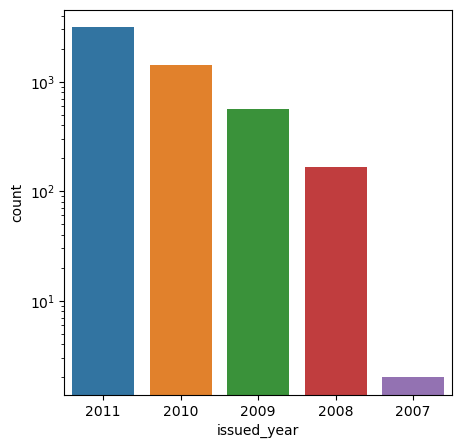

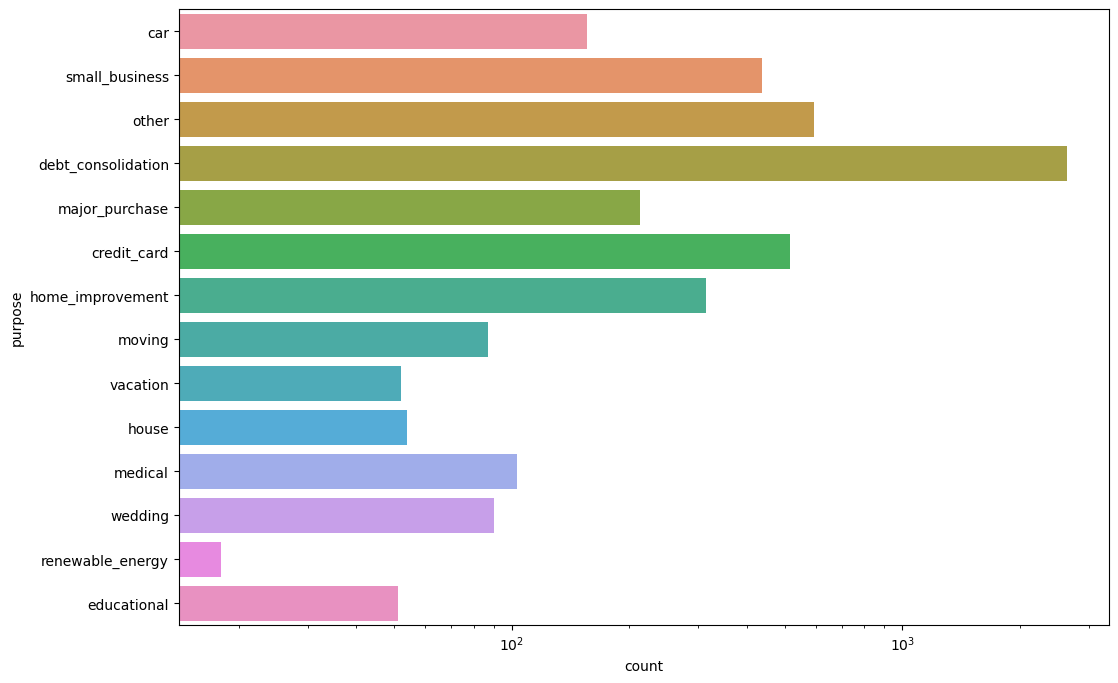

In [38]:
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'emp_length',0)
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'home_ownership',0)
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'issued_month',0)
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'issued_year',0)

fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_history_data[loan_history_data.loan_status == 'Charged Off'])
plt.show()

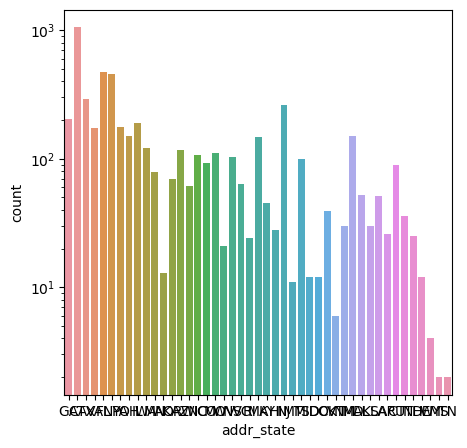

In [39]:
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'addr_state')

### Univariant Segmented analysis

In [40]:
### create buckets for installments, loan amounts, interest rates, dti and funded amount investment group
loan_history_data['loan_amnt_groups'] = pd.cut(loan_history_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_history_data['interest_rate_groups'] = pd.cut(loan_history_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_history_data['installment_groups'] = pd.cut(loan_history_data['installment'], bins=10,precision =0,labels=['15-150','150-270','270-420','420-530','530-660','660-800','800-960','960-1000','1000-1160','1160-1350'])
loan_history_data['dti_groups'] = pd.cut(loan_history_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])


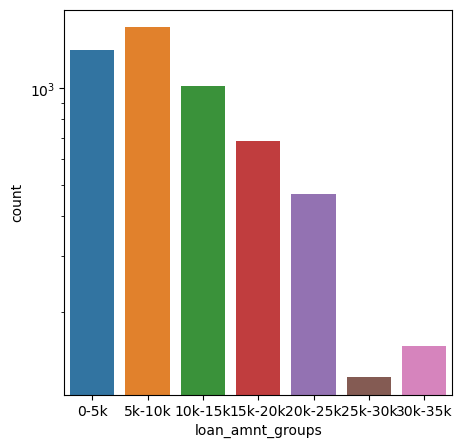

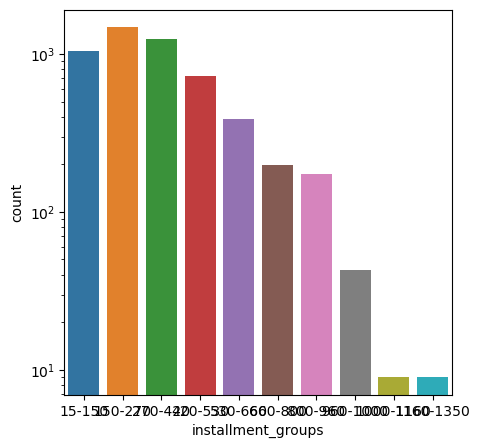

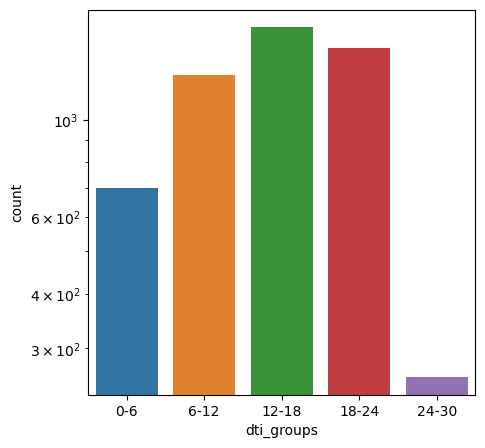

In [41]:
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'loan_amnt_groups')
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'installment_groups')
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'dti_groups')


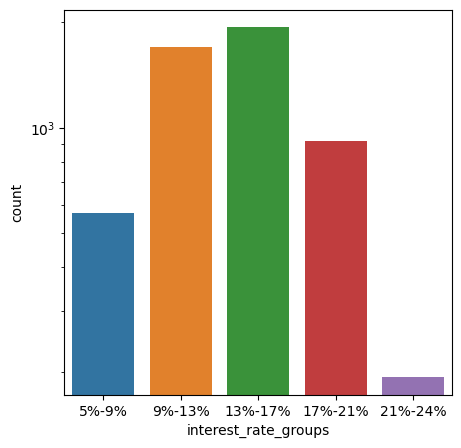

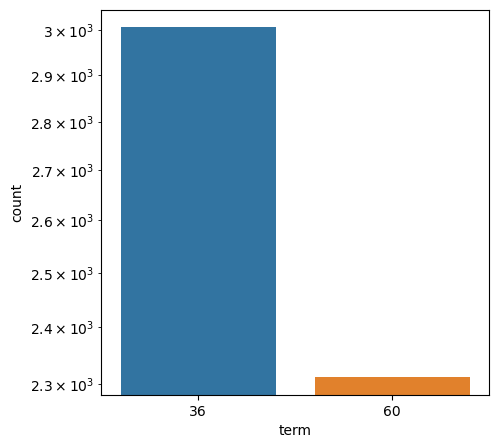

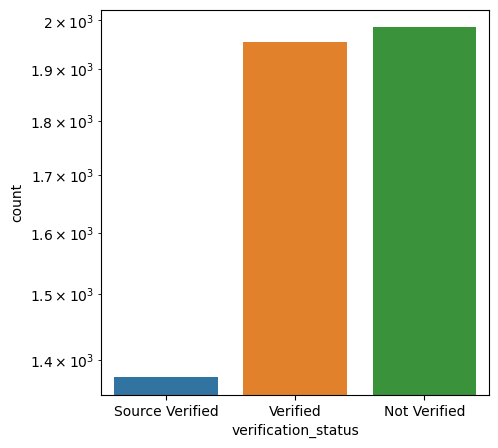

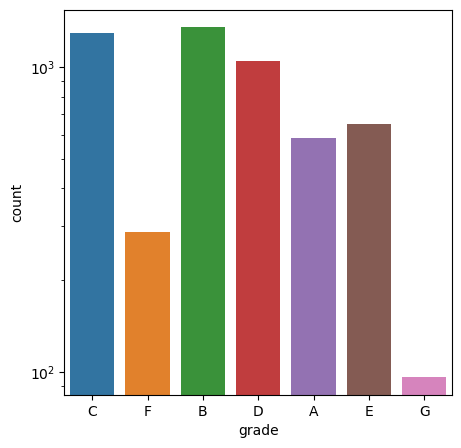

In [42]:
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'interest_rate_groups')
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'term')
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'verification_status')
create_countplot(loan_history_data[loan_history_data['loan_status']=='Charged Off'],'grade')


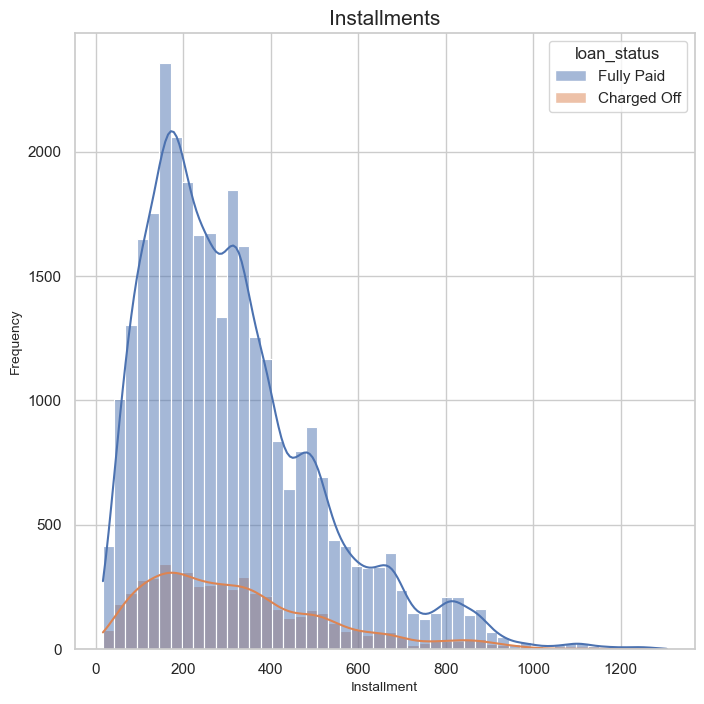

In [43]:
sns.set(style="whitegrid")
# Create the histogram
plt.figure(figsize=(8,8))
sns.histplot(data=loan_history_data, x='installment',hue='loan_status', bins=50, kde=True)
plt.title("Installments", fontsize=15)
plt.xlabel('Installment', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

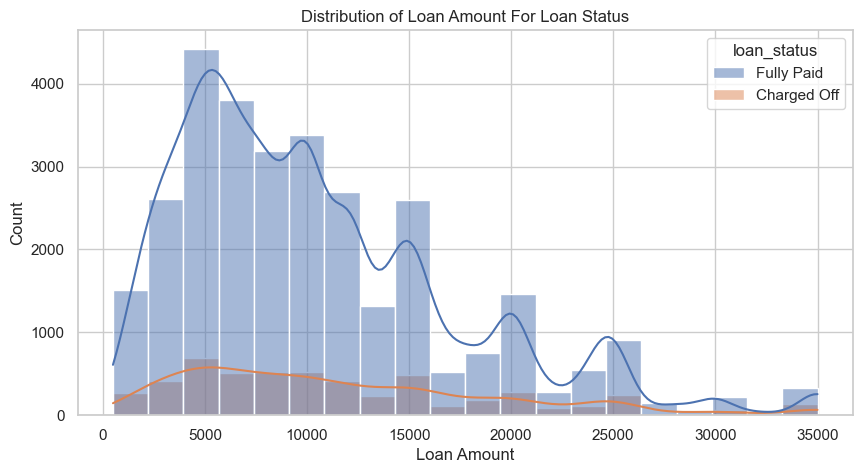

In [44]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_history_data,x='loan_amnt',hue='loan_status',bins=20,kde=True)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount For Loan Status',fontsize=12)
plt.show()


- Applicants are employed for more than 10 years a for are accountable for the highest number of "Charged off" loans. This shows the long term employment history will not necessarily guarantee successful loan repayment.
- The majority of defaulted loan members are individuals, lived in rented houses. The lending company should assess the financial stability of applicants living in rented houses during the loan approval process.
- "Charged off" loans are mostly that are taken during the 4th quarter(December, November and October) primarily in December. This might be the reason for loan application during the holiday season.
- The trend says, the Charged Off loans are increasing year by year. The lending company should carefully assess the loan approval process.
- Most of the Charged off loans are due to Debt Consolidation. The lending company should be careful when approving loans for this purpose.
- California state had the highest number of Charged off loan applicants. The lending company needs to implement stricter eligibility criteria as there are higher number of "Charged off" applicants from this state.
- Short term loans with a duration of 3 years or 36 months are popular among Charged Off loan applicants. This shows that short terms loans have risk prone.
- - The following are some of the reasons for Charged Off loans
  - Loan amounts between 5k to 10k
  - installment amount between 180$ to 270$
  - Interest rate between 13% to 17%
  - Debt to Payments ratio between 12 to 24.
.

### Bivariant Analsys
#### Bivariant Analsys - Loan Amount vs purpose, home ownership, grade

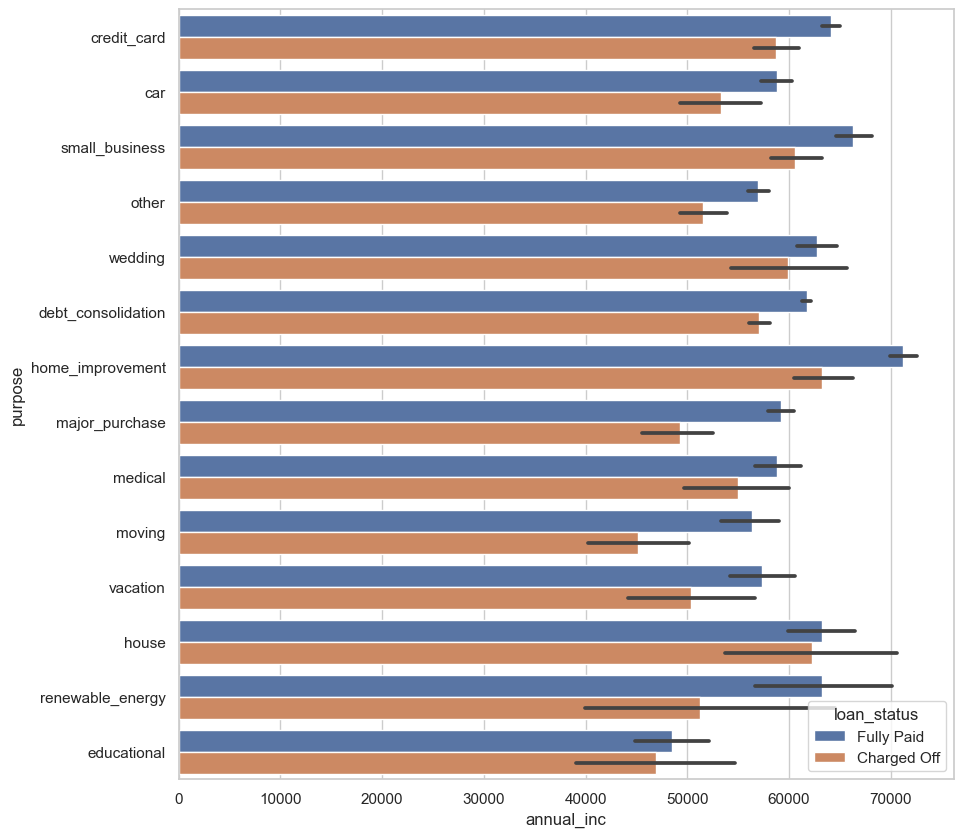

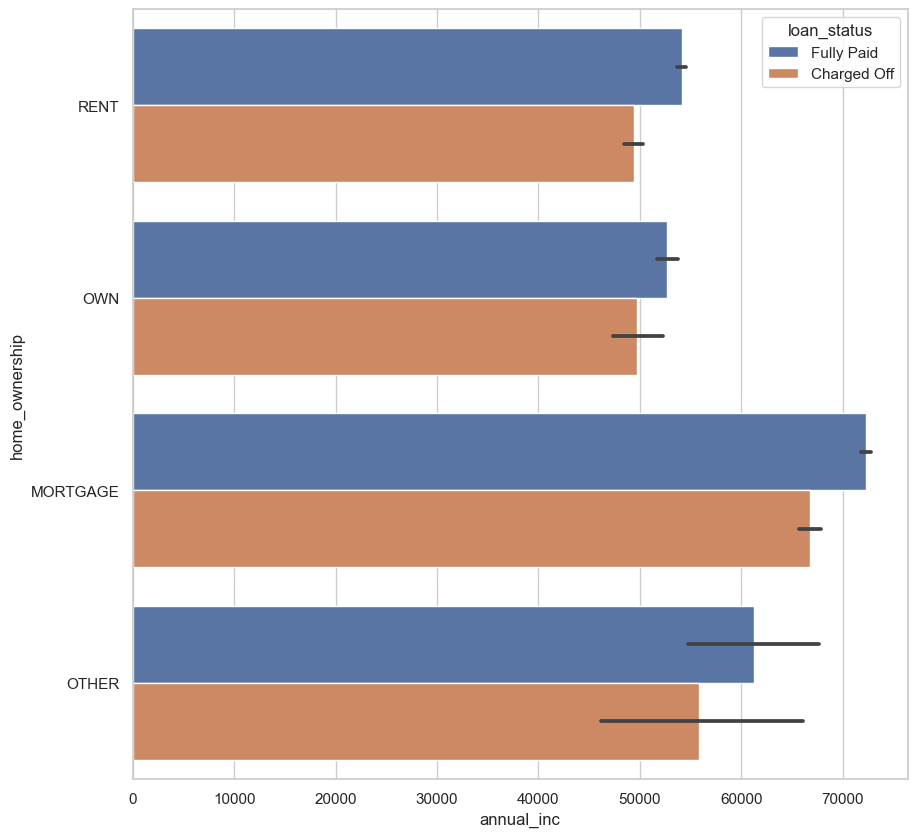

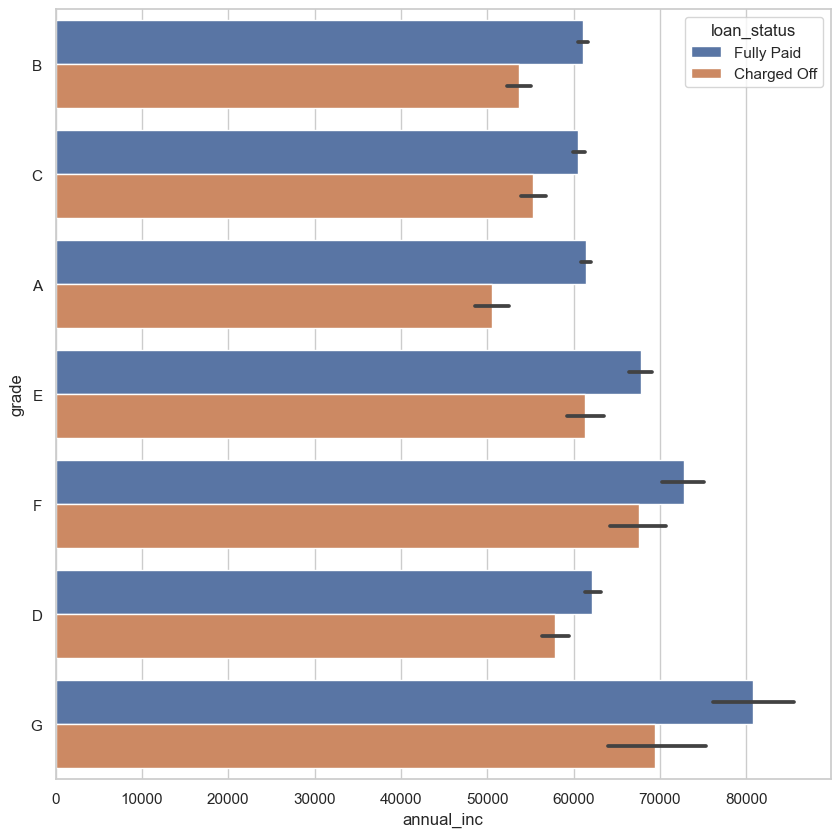

In [45]:
create_barplot(loan_history_data,'annual_inc','purpose','loan_status')
create_barplot(loan_history_data,'annual_inc','home_ownership','loan_status')
create_barplot(loan_history_data,'annual_inc','grade','loan_status')

#### Bivariant Analsys - Loan Amount vs purpose, home ownership, grade

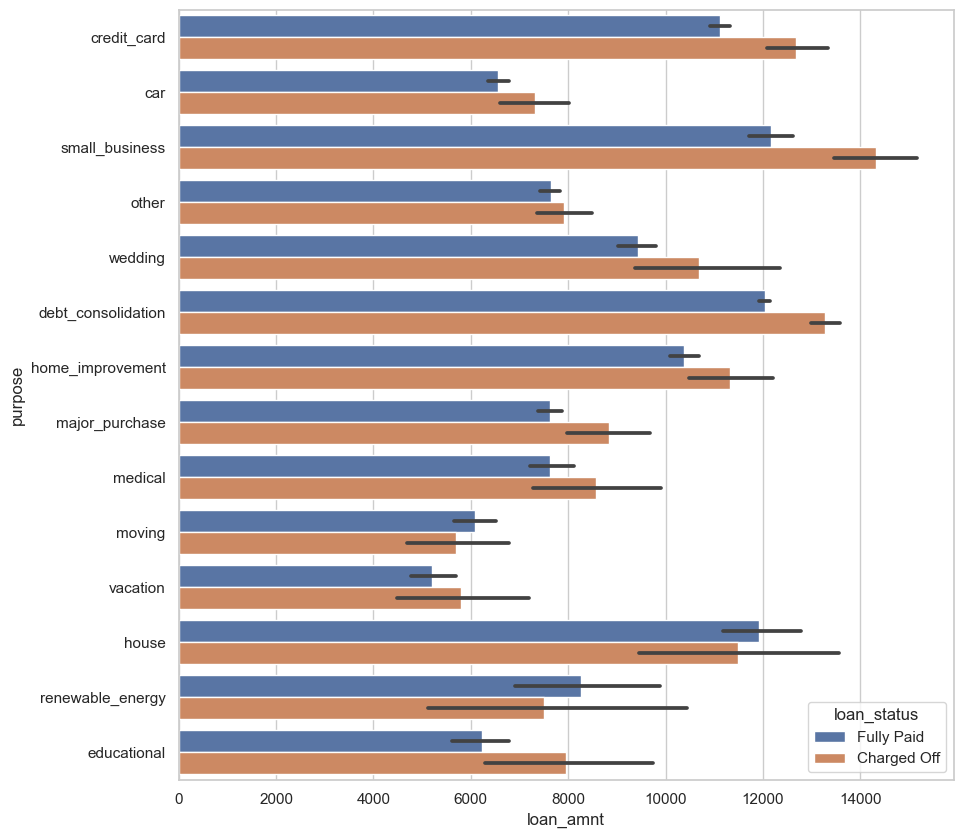

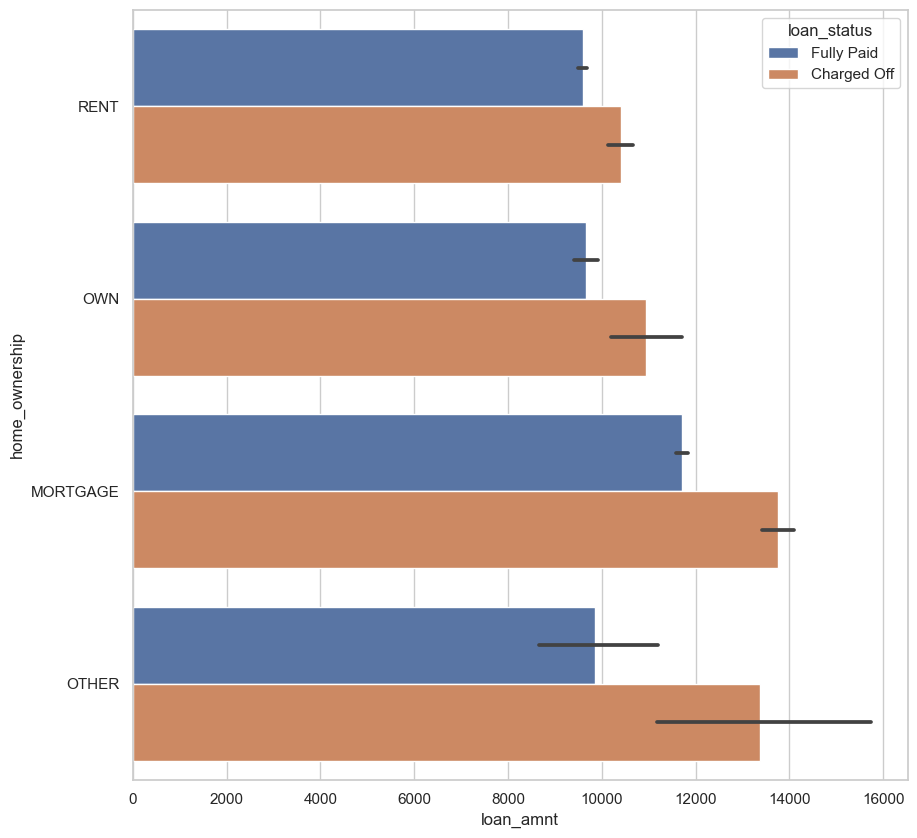

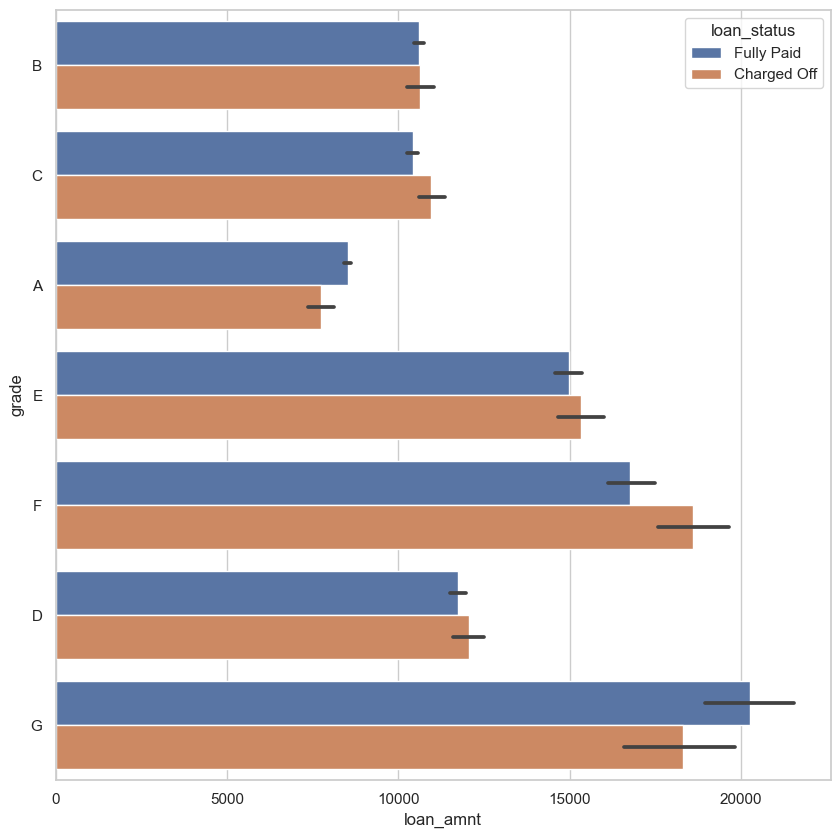

In [46]:
create_barplot(loan_history_data,'loan_amnt','purpose','loan_status')
create_barplot(loan_history_data,'loan_amnt','home_ownership','loan_status')
create_barplot(loan_history_data,'loan_amnt','grade','loan_status')


### Bivariant Segmented Analsys

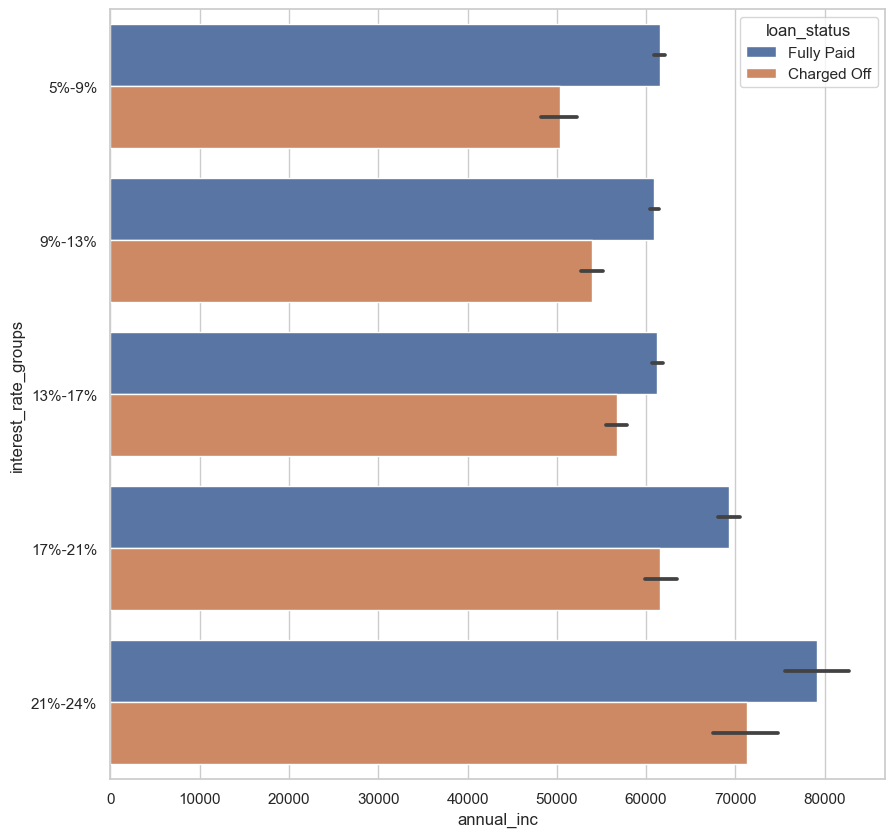

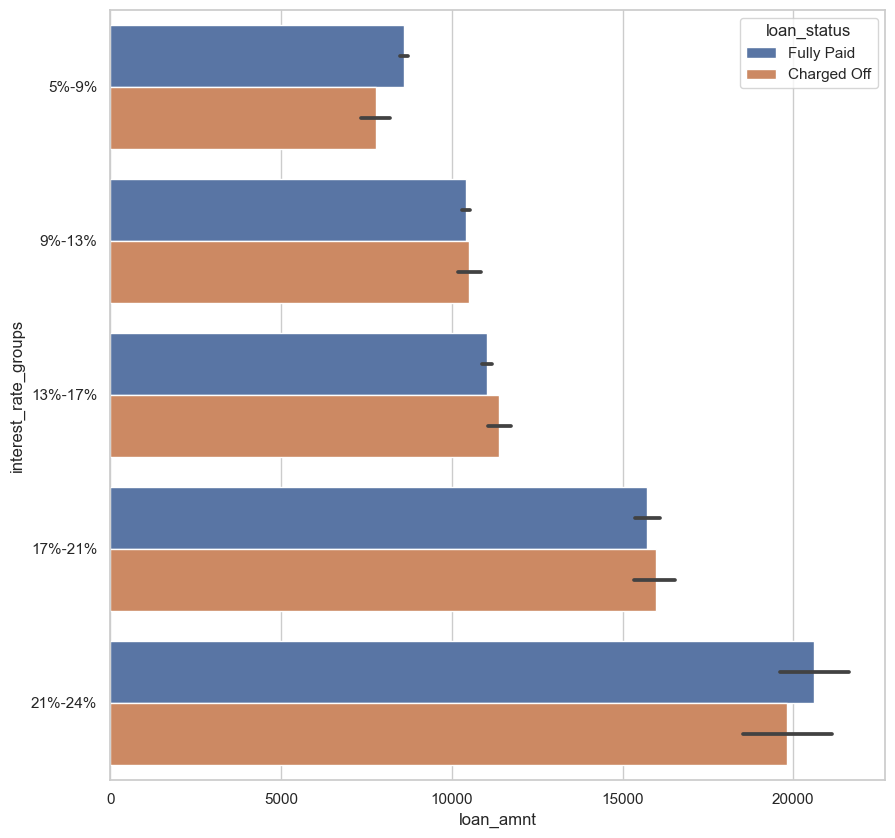

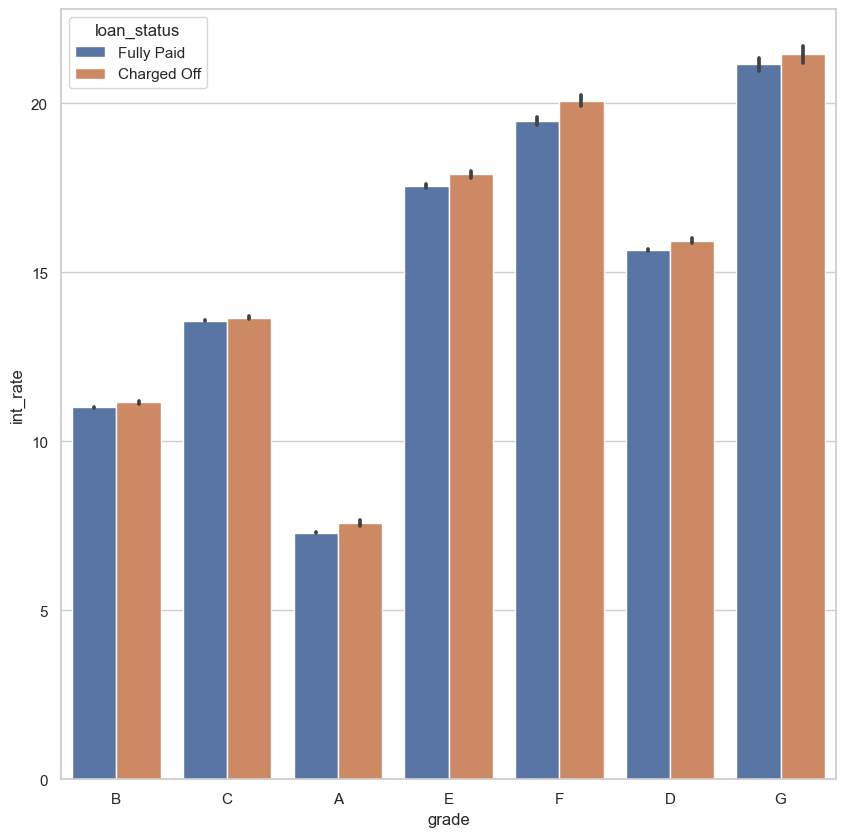

In [47]:
create_barplot(loan_history_data,'annual_inc','interest_rate_groups','loan_status')
create_barplot(loan_history_data,'loan_amnt','interest_rate_groups','loan_status')
create_barplot(loan_history_data,'grade','int_rate','loan_status')

### BiVariant Analysis Observations
- Applicants with annual income more than 60k and applying for either home or home improvement or small business has higher chances of defaulting.
- 
Applicants with Grade E, F, G and applying for 15k or more loan amoun.
- 
Applicants applying for over 12k loan amount for the purpose of credit card, debt consolidation or house are pro to defaulting.
- “Charged Off” loans are likely to happen if the applicants annual income is over 70k and interest rate is between 21-24% 
- 
“Charged Off” loans are likely to happen if the Loan amount is over 15k and interest rate is between 21-24.
- 
“Charged Off” loans are likely to happen with F & G grades if the interest rate is ov 20%

The above are the some of the observations of the Bivariant analysis0lt




In [48]:
loan_history_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'pub_rec_bankruptcies', 'issued_month',
       'issued_year', 'loan_amnt_groups', 'interest_rate_groups',
       'installment_groups', 'dti_groups'],
      dtype='object')

In [49]:
correlation_df = loan_history_data[['loan_amnt',  'term', 'int_rate','dti',
       'installment', 'emp_length', 'pub_rec_bankruptcies','annual_inc']]


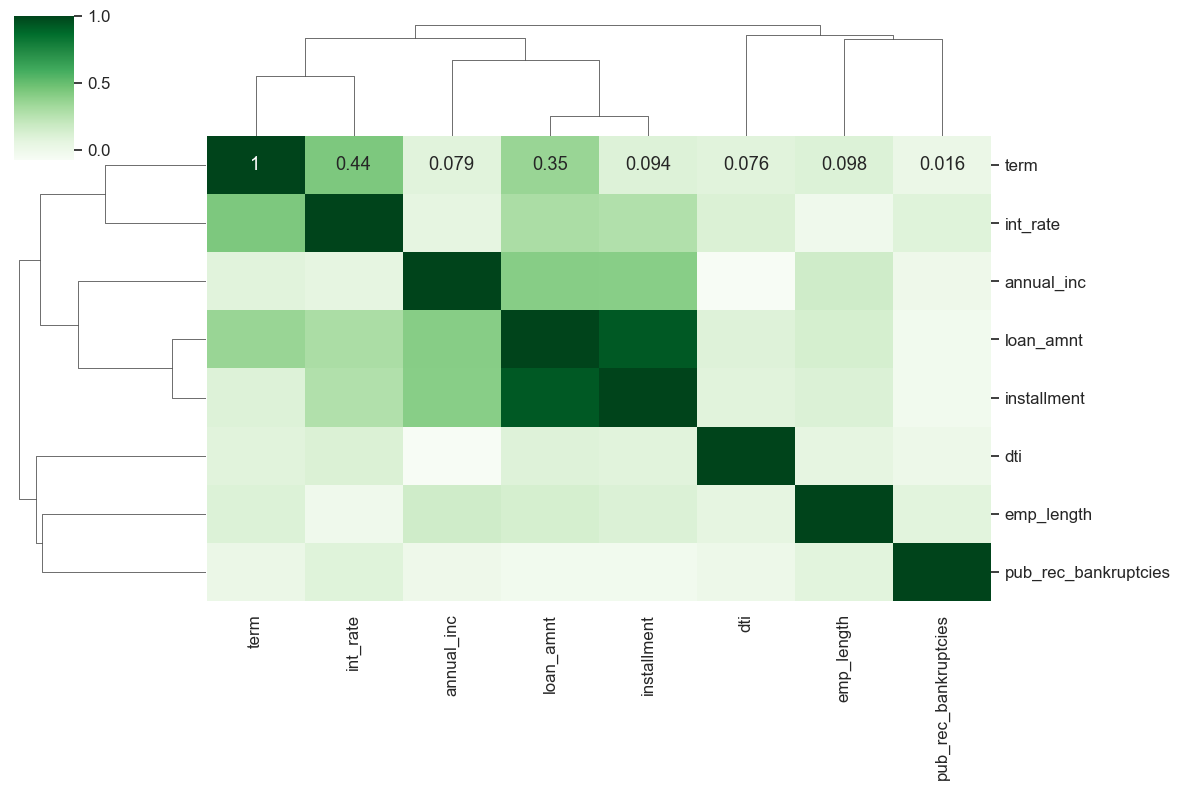

In [50]:
corr = correlation_df.corr()
sns.set(font_scale=1.1)

sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Greens")
plt.show()

# Inferences from Correlation Metrics

- installment and loan amount has a strong correlation
- 
term and interest rate has strong correlatio
- 
annual income and loan amount has a strong correlati
- n
dti has weak correlation with other fie
- ds
dti and annual income has negative corela
- ion
emp_length has weak correlation with other f
- elds
pub_rec_bankrupticies has weak correlation with  every fielddint

## Multivariant Analysis

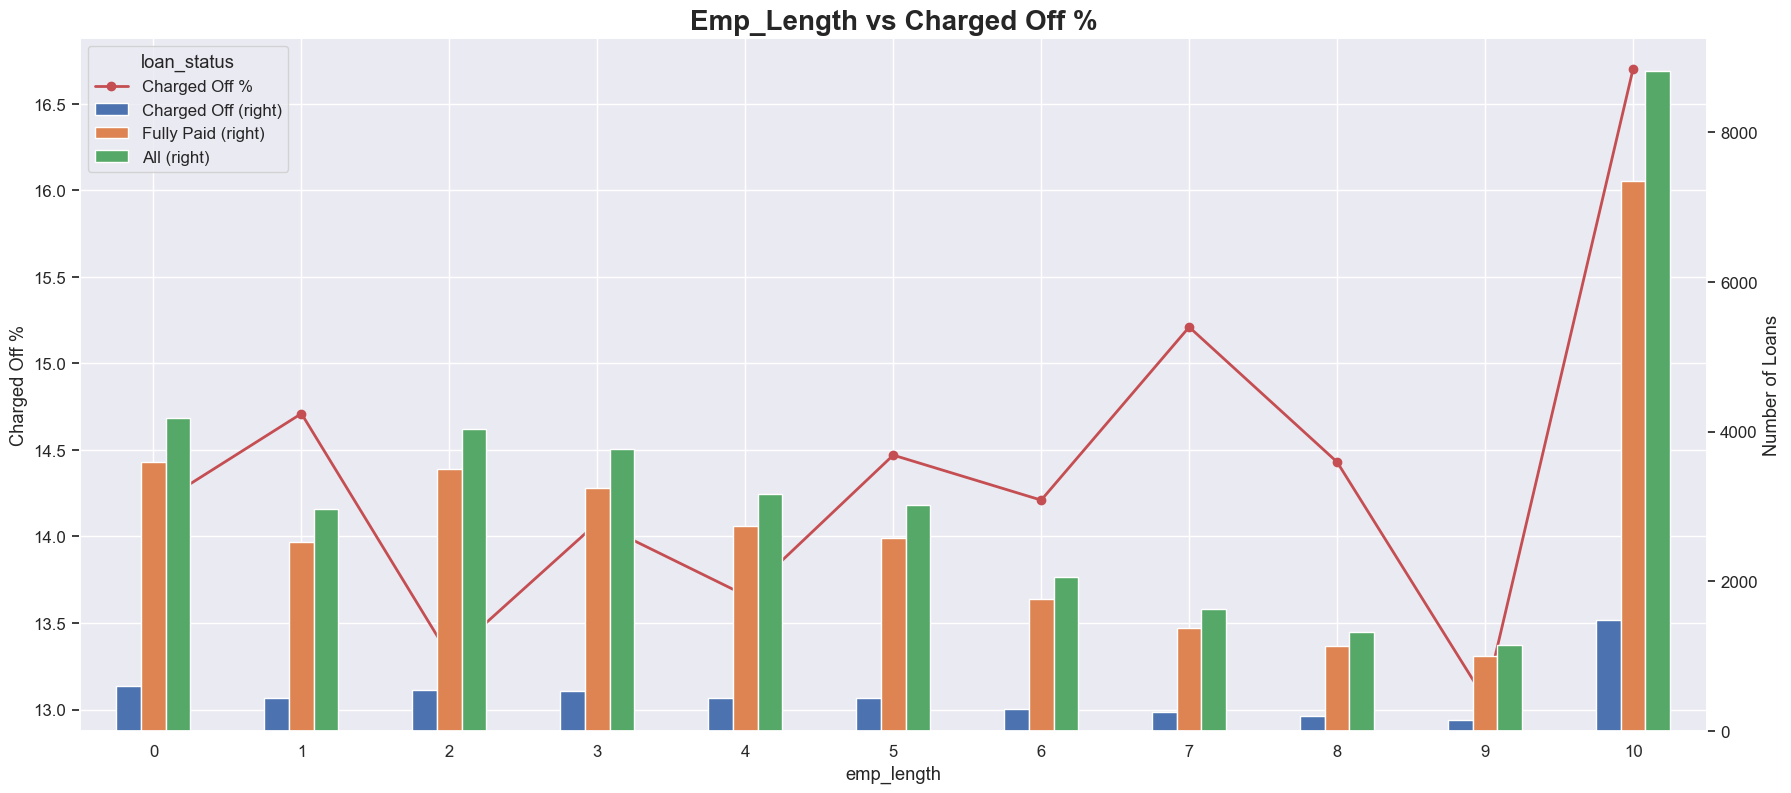

In [51]:
create_bar_line_plot(loan_history_data,'emp_length')

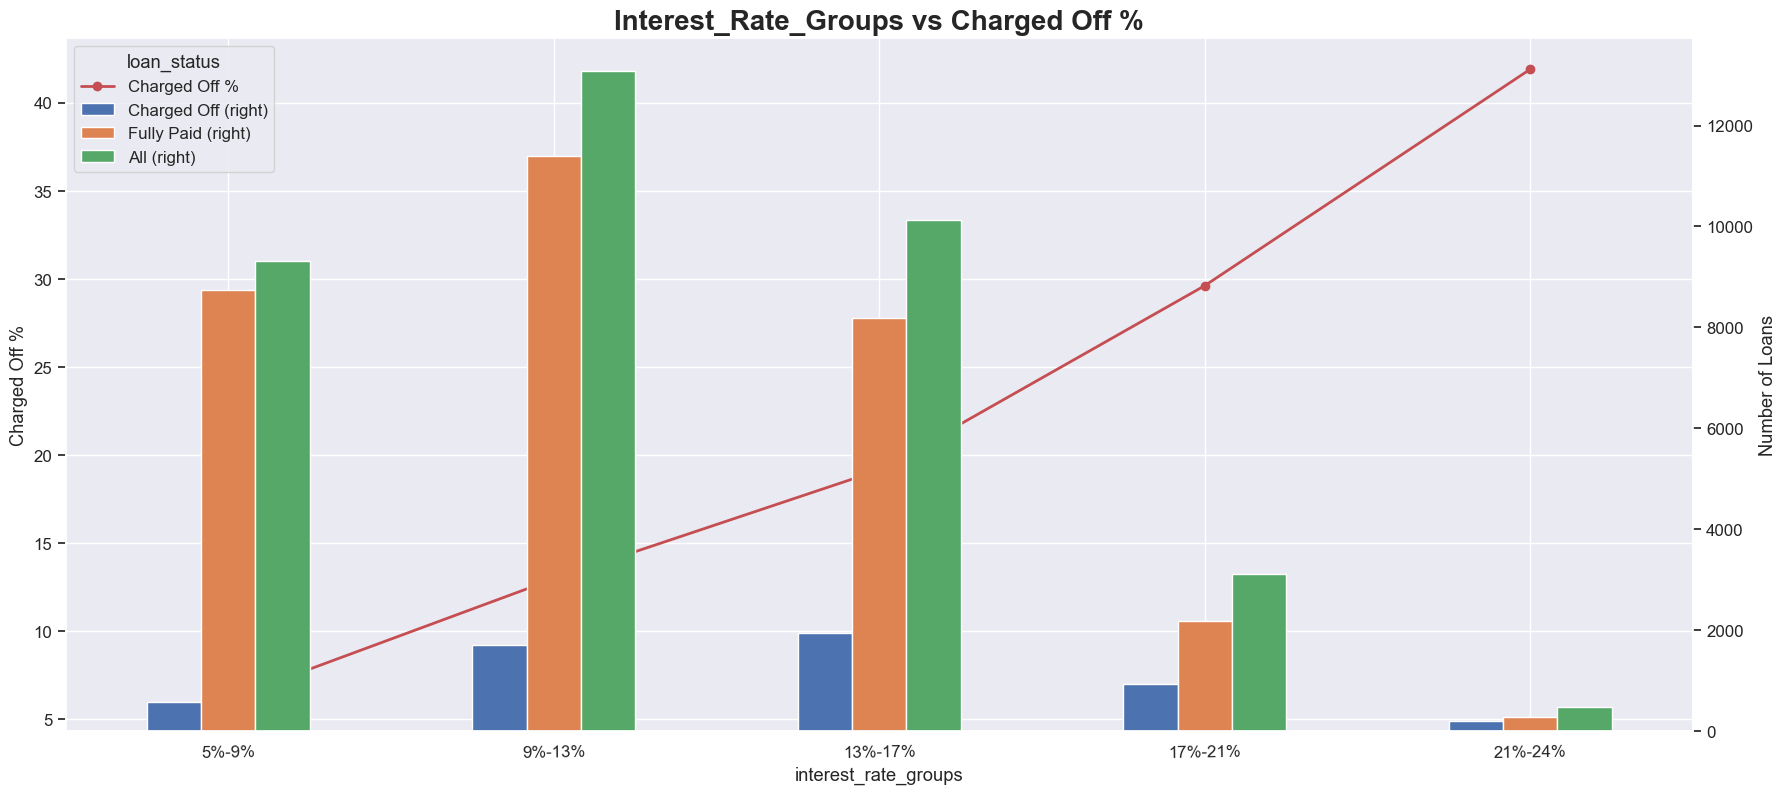

In [52]:
create_bar_line_plot(loan_history_data,'interest_rate_groups')

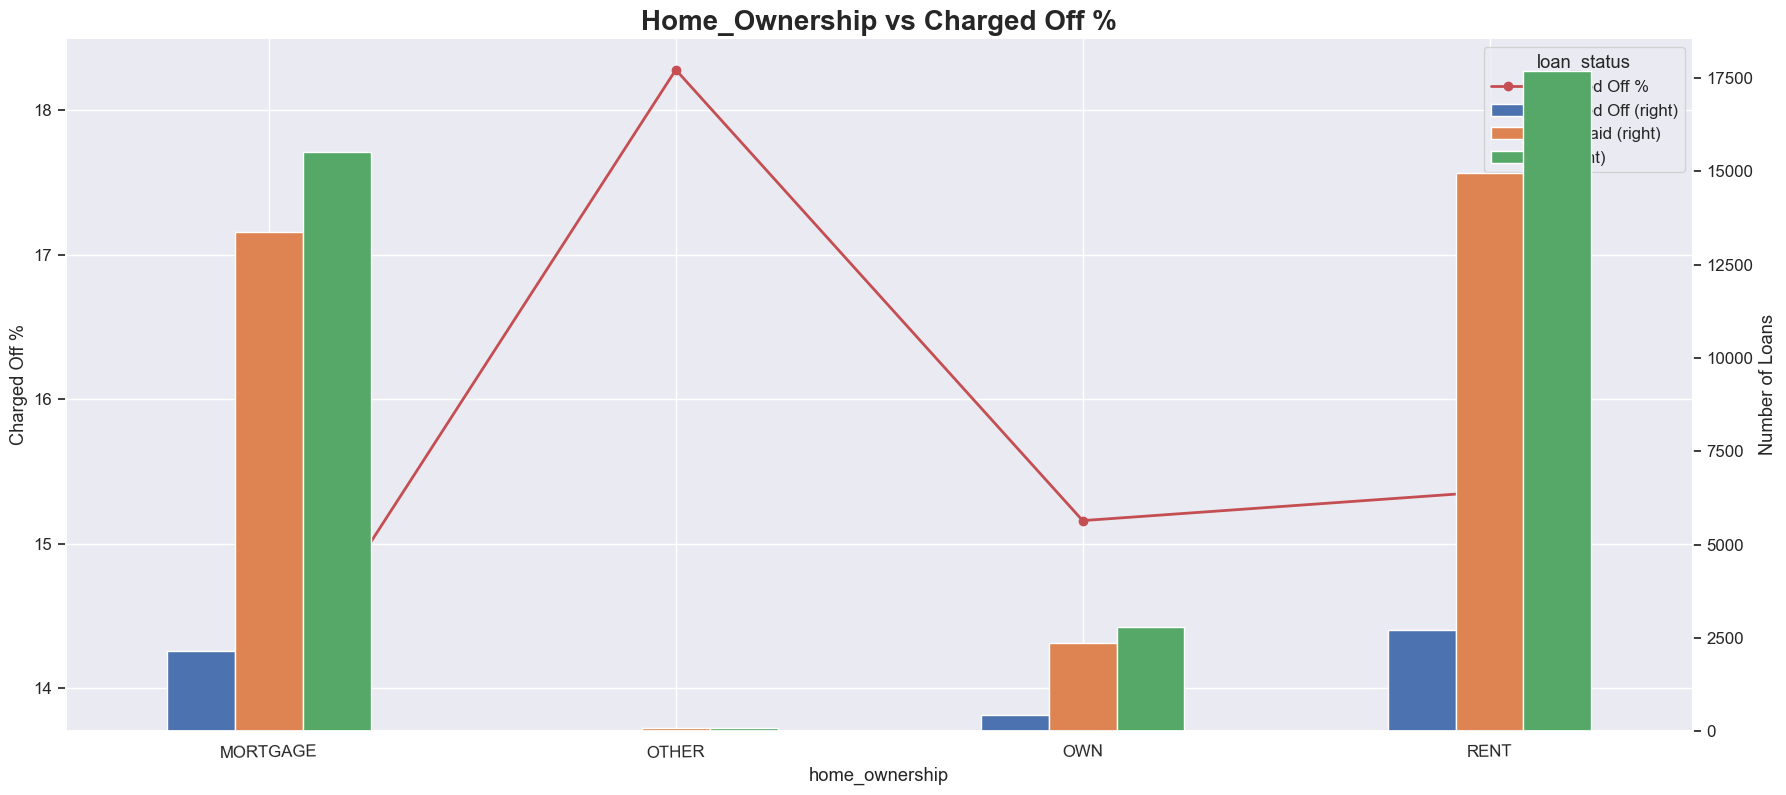

In [53]:
create_bar_line_plot(loan_history_data,'home_ownership')

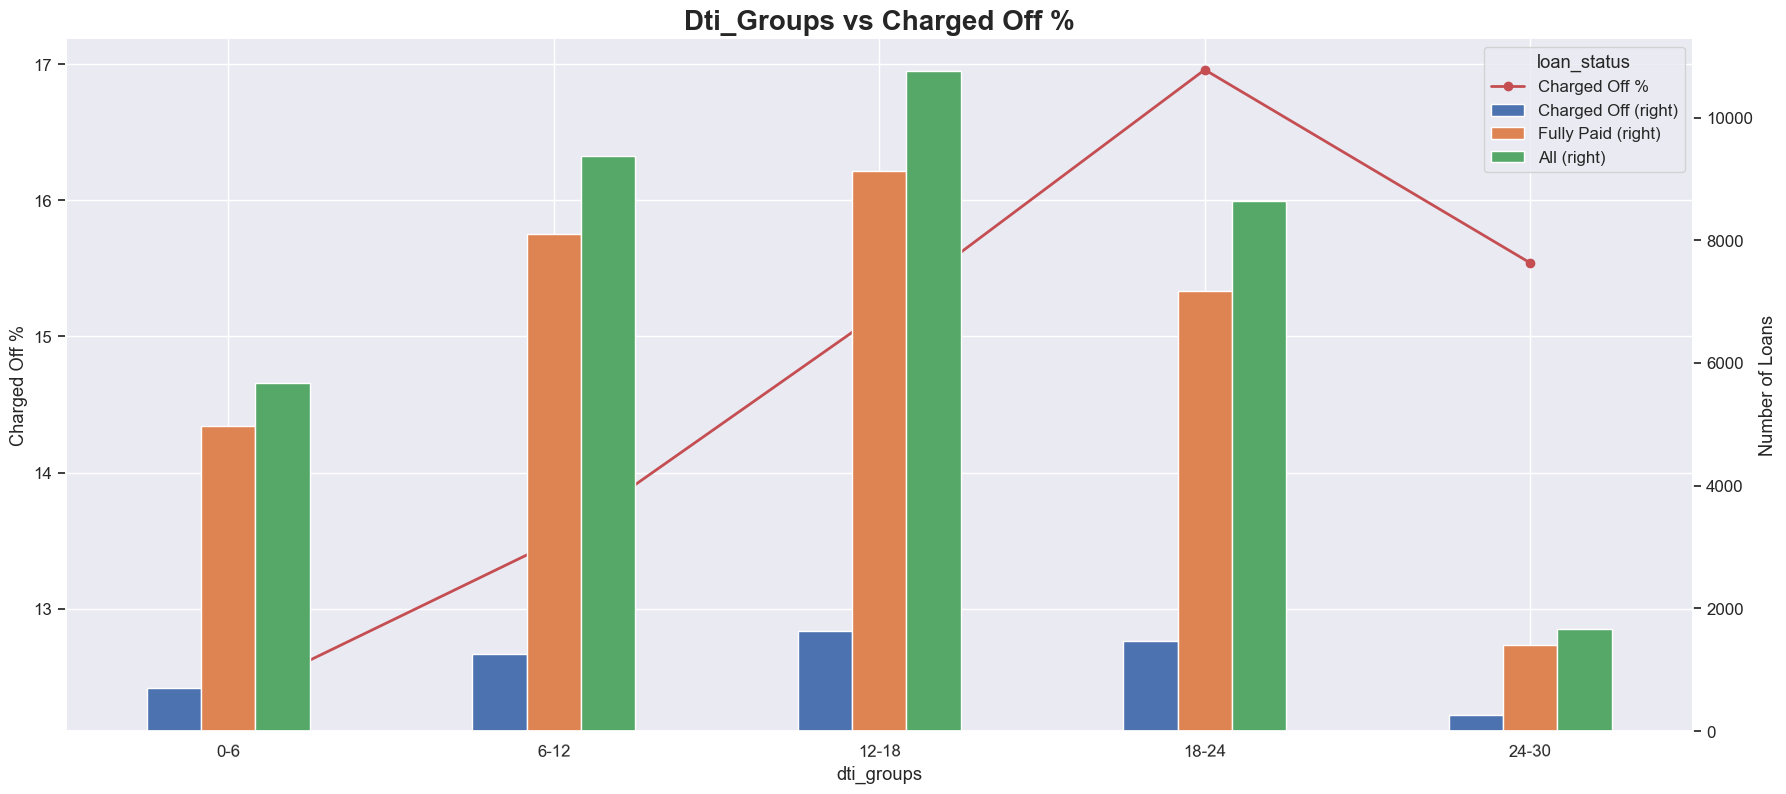

In [54]:
create_bar_line_plot(loan_history_data,'dti_groups')

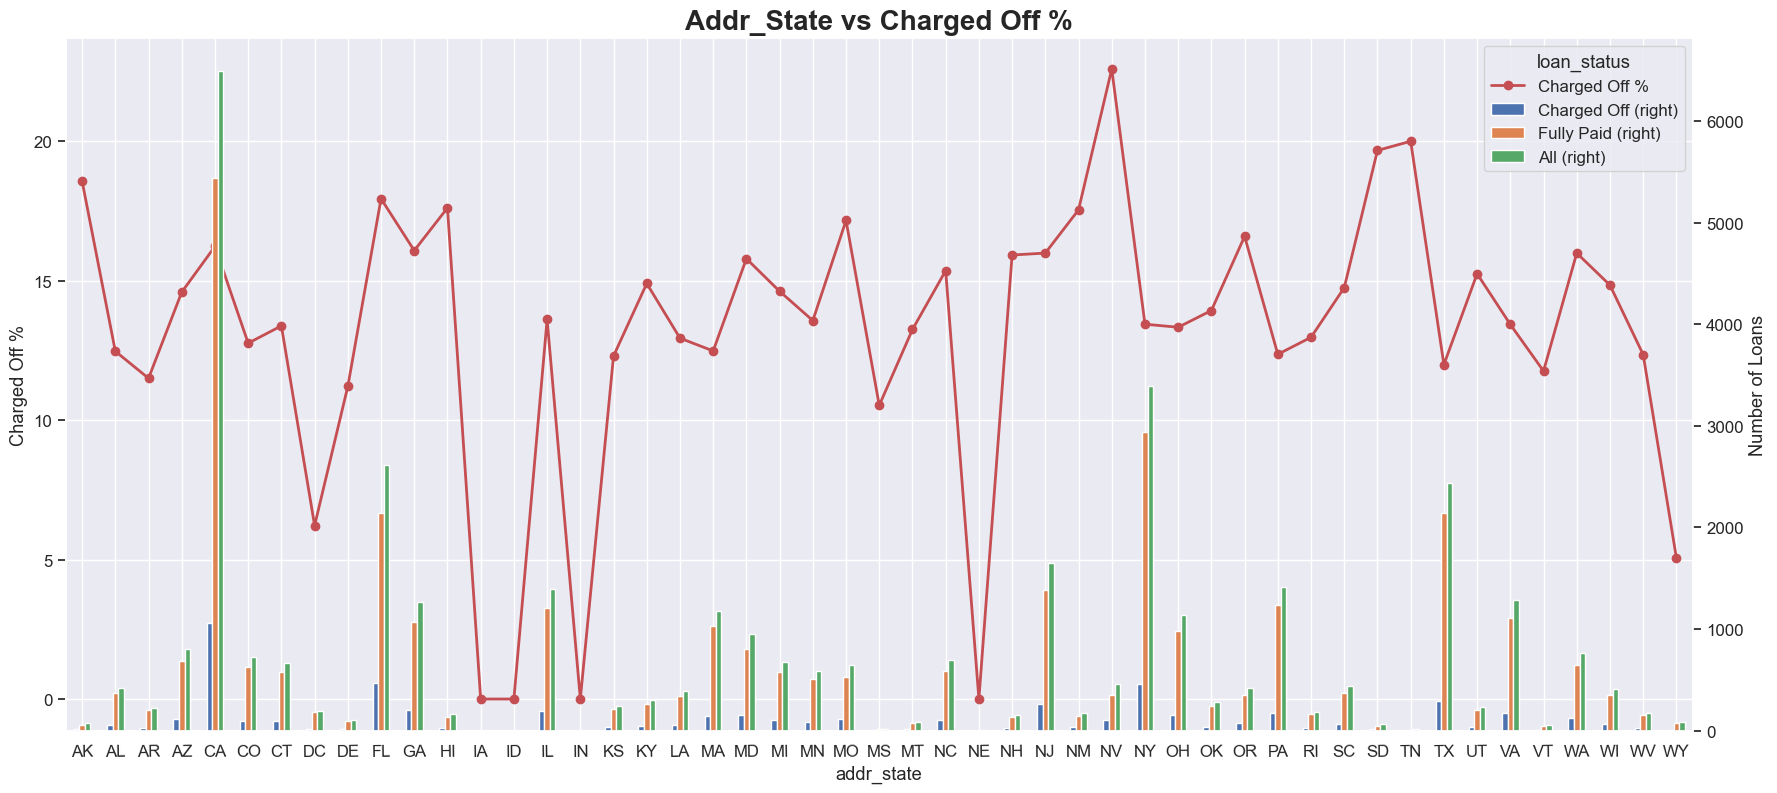

In [55]:
create_bar_line_plot(loan_history_data,'addr_state')

## Overall Observations
- Applicants who are employed for more than 10 years are accountable for the highest number of "Charged off" loans.
- The majority of defaulted loan members are individuals, living in rented houses.
- "Charged off" loans are mostly that are taken during the 4th quarter(December, November and October) primarily in December. This might be the reason for loan application during the holiday season.
- The trend says, the Charged Off loans are increasing year by year.
- Most of the Charged off loans are due to Debt Consolidation.
- California state had the highest number of Charged off loan applicants.
- Short term loans with a duration of 3 years or 36 months are popular among Charged Off loan applicants.
- Applicants with annual income more than 60k and applying for either home or home improvement or small business has higher chances of defaulting.
- Applicants with Grade E, F, G and applying for 15k or more loan amount.
- Applicants applying for over 12k loan amount for the purpose of credit card, debt consolidation or house are prone to default.
